# PW6 Epidemic models

## The SIR epidemic model

A simple mathematical description of the spread of a disease in a population is the so-called SIR model, which divides the (fixed) population of N
 individuals into three "compartments" which may vary as a function of time, t:

-S(t) are those susceptible but not yet infected with the disease;

-I(t) is the number of infectious individuals;

-R(t) are those individuals who have recovered from the disease and now have immunity to it.

The SIR model describes the change in the population of each of these compartments in terms of two parameters, $\beta$ and $\gamma$. Here, $\beta$  represents the transmission rate, i.e., the rate of healthy people becoming infected and $\gamma$  represents the recovery rate, i.e., the rate of infected people becoming withdrawn. 

The differential equations describing this model were first derived by Kermack and McKendrick [Proc. R. Soc. A, 115, 772 (1927)]:

\begin{align}
{dS \over dt}&= −{\beta SI }\\
{dI \over dt}&={\beta SI} -\gamma I,\\
{dR \over dt}&=\gamma I,
\end{align}
 

The following Python code integrates these equations for a disease characterised by parameters $\beta=0.0005$
, $1/\gamma=10$ days in a population of $N=1000$.
 (perhaps flu in a school). The model is started with a single infected individual on day $0$ : $I(0)=1$. The curves plots $S(t)$, $I(t)$ and $R(t)$ on a same graph.


The program uses the function "odeint" that is a pre-programmed function that integrates the differential equations system. The "odeint" is part of ODEPACK that is a FORTRAN77 library which implements a variety of solvers for ordinary differential equations.



Plot several graphs with different values of  $R_0$, below and above the reproduction number threshold $$R_0={\beta S(0) \over \gamma }=1$$. Vary also the other parameter $\gamma=1/\delta t$, $\delta t$ being the average duration of the infection and discuss the obtained results. Plot several curves.
On each graph, display as a legend the value of $R_0$ and the values of the modified parameters.

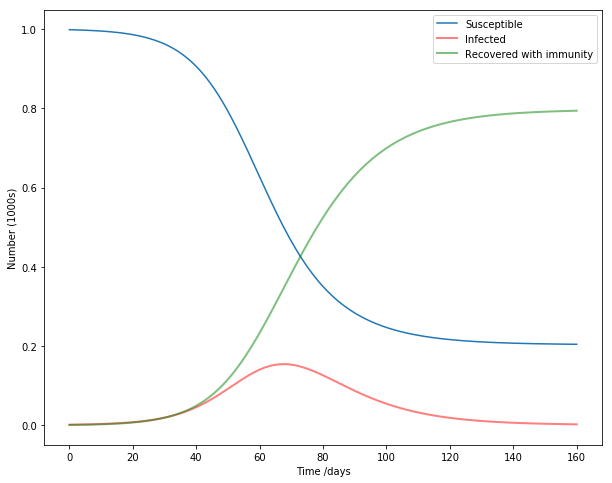

In [26]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Total population, N.
N = 1000
# Initial number of infected and recovered individuals, I0 and R0.
# Be aware that R0 is the number of recovered individuals at t=0, 
# and has nothing to do with R_0 the reproduction number
I0, R0 = 1, 0
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0
# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
beta, gamma = 0.0002, 1/10
# A grid of time points (in days)
t = np.linspace(0, 160, 160)

# The SIR model differential equations.
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I 
    dIdt = beta * S * I  - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Initial conditions vector
y0 = S0, I0, R0
# Integrate the SIR equations over the time grid, t and the solution 
# is a table of 3 columns  and 160 rows
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
#print(type(ret),ret.shape)
#to check the size of the table
#print(ret)
#print()
#print(ret[:,0])
#It takes the first column of the array 
S=ret[:,0]
I=ret[:,1]
R=ret[:,2]
#S, I, R = ret.T is a shorter way of taking the transposition 
#print(ret.T)

# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w',figsize=[10,8])
plt.plot(t, S/1000,  label='Susceptible')
plt.plot(t, I/1000, 'r', alpha=0.5, lw=2, label='Infected')
plt.plot(t, R/1000, 'g', alpha=0.5, lw=2, label='Recovered with immunity')

plt.xlabel('Time /days')
plt.ylabel('Number (1000s)')
plt.legend()

plt.show()


#### Ref:  https://scipython.com/book/chapter-8-scipy/additional-examples/the-sir-epidemic-model/

## The SIER model

The SEIR model is a bit more elaborate: it takes into account three more assumptions than the SIR model, the demography of the population in particular. The total population N(t) evolves therefore during the time $t$.

Here is the evolution from the SIR model to the SEIR model:

A new sub-population is added: the non-infectious (exposed) infected persons, who are therefore not contagious, represented by the function $E(t)$

 which allows to take into account the incubation period (via $\alpha$ the incubation rate) of a disease. Taking the scheme and system from the SIR model, and adding a term $\pm \alpha E(t)$.
The birth rate $\nu$ of the population is also considered. People are assumed to be born healthy, so we add a term $\nu N(t)$
Finally, we complete with the addition of the mortality rate $\mu$ of the population. 

Since a person can die whatever his or her state ($S$,$ E$, $I$ or$ R$), and from a cause unrelated to the epidemic, we therefore remove these people from each line (i.e. $-\mu S(t)$ or $\mu E(t)$, or $\mu I(t)$ or $\mu R(t)$
 depending on the subpopulation considered).
 
 The SIER model is given by the following system:
 \begin{align}
{dS \over dt}&= −{\beta SI } + \nu N(t) -\mu S\\
{dE \over dt}&={\beta SI }-\alpha E -\mu E\\
{dI \over dt}&=\alpha E -\gamma I -\mu I ,\\
{dR \over dt}&=\gamma I - \mu R,
\end{align}
 


Modify the previous code to integrate the SIER model and plot the four curves as a function of time.

Plot several graphs depending on the value of the reproduction number  $$R_0={\alpha \over (\alpha + \mu)}{\beta S(0) \over (\gamma + \mu) }$$, $R_0 >1$ and $R_0<1$  and varying at least three parameters.

As input datas, you can use: $\alpha=0.75, \beta=0.8, \gamma=0.05, \nu=0.01, \mu = 0.009$ and $E(0) = 100$, and as previously $N=1000, I(0)=10, R(0)=0$.
On each graph, display as a legend the value of $R_0$ and the values of the modified parameters.

Below is the graph to obtain with those inital values : 

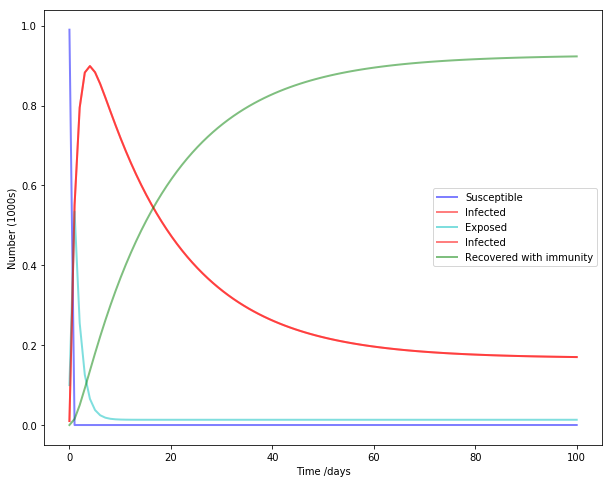